In [32]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import networkx as nx

In [15]:
import pandas as pd
import numpy as np
from scipy.signal import medfilt
import glob, os

# Ruta donde están los .ts
path_grupo = r"C:\Users\mafig\OneDrive\modelos Gait\als"

def cargar_filtrar_ts(path):
    df = pd.read_csv(path, delim_whitespace=True, header=None)
    df.columns = [
        "Elapsed_Time",
        "Left_Stride", "Right_Stride",
        "Left_Swing", "Right_Swing",
        "Left_Swing_%", "Right_Swing_%",
        "Left_Stance", "Right_Stance",
        "Left_Stance_%", "Right_Stance_%",
        "Double_Support", "Double_Support_%"
    ]
    df = df[df["Elapsed_Time"] > 20].reset_index(drop=True)
    for col in df.columns.drop("Elapsed_Time"):
        df[col] = medfilt(df[col], kernel_size=3)
    return df

def matriz_correlacion(df):
    cols = [
        "Left_Stride", "Right_Stride",
        "Left_Swing", "Right_Swing",
        "Left_Stance", "Right_Stance",
        "Double_Support"
    ]
    return df[cols].corr()

def procesar_grupo(folder_path):
    archivos = glob.glob(os.path.join(folder_path, "*.ts"))
    if len(archivos) == 0:
        raise FileNotFoundError(f"No se encontraron archivos .ts en {folder_path}")
    
    matrices = []
    for archivo in archivos:
        df = cargar_filtrar_ts(archivo)
        corr = matriz_correlacion(df)
        matrices.append(corr)
    
    mean_corr = sum(matrices) / len(matrices)
    return mean_corr

# ---- Ejecutar ----
mean_corr_als = procesar_grupo(path_grupo)

print("Matriz de correlación promedio (ALS):")
print(mean_corr_als)


Matriz de correlación promedio (ALS):
                Left_Stride  Right_Stride  Left_Swing  Right_Swing  \
Left_Stride        1.000000      0.739462    0.438200     0.268328   
Right_Stride       0.739462      1.000000    0.257363     0.338546   
Left_Swing         0.438200      0.257363    1.000000     0.176888   
Right_Swing        0.268328      0.338546    0.176888     1.000000   
Left_Stance        0.861569      0.764673    0.162178     0.299005   
Right_Stance       0.709638      0.876115    0.263275     0.092592   
Double_Support     0.665802      0.581529    0.092471    -0.012612   

                Left_Stance  Right_Stance  Double_Support  
Left_Stride        0.861569      0.709638        0.665802  
Right_Stride       0.764673      0.876115        0.581529  
Left_Swing         0.162178      0.263275        0.092471  
Right_Swing        0.299005      0.092592       -0.012612  
Left_Stance        1.000000      0.732533        0.747091  
Right_Stance       0.732533      1.000000

In [25]:
import seaborn as sns

<Axes: >

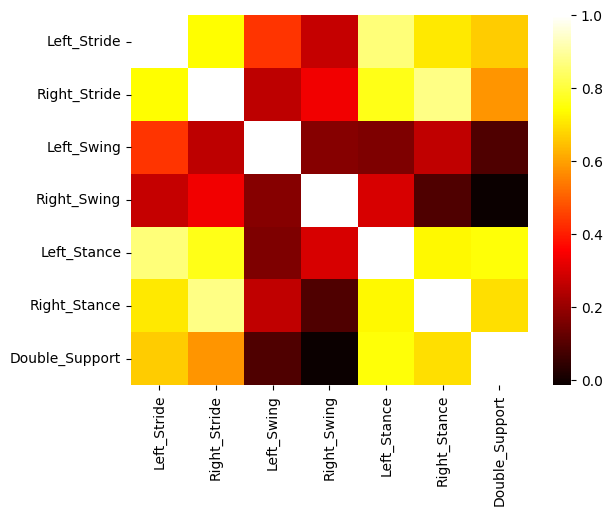

In [5]:
sn.heatmap(mean_corr_als,cmap='hot')

<Axes: >

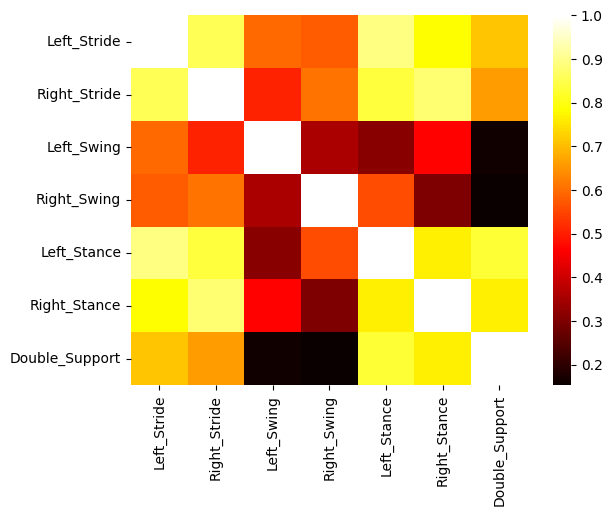

In [9]:
sn.heatmap(mean_corr_control,cmap='hot')

In [17]:

# Ruta donde están los .ts
path_grupo = r"C:\Users\mafig\OneDrive\modelos Gait\control"

def cargar_filtrar_ts(path):
    df = pd.read_csv(path, delim_whitespace=True, header=None)
    df.columns = [
        "Elapsed_Time",
        "Left_Stride", "Right_Stride",
        "Left_Swing", "Right_Swing",
        "Left_Swing_%", "Right_Swing_%",
        "Left_Stance", "Right_Stance",
        "Left_Stance_%", "Right_Stance_%",
        "Double_Support", "Double_Support_%"
    ]
    df = df[df["Elapsed_Time"] > 20].reset_index(drop=True)
    for col in df.columns.drop("Elapsed_Time"):
        df[col] = medfilt(df[col], kernel_size=3)
    return df

def matriz_correlacion(df):
    cols = [
        "Left_Stride", "Right_Stride",
        "Left_Swing", "Right_Swing",
        "Left_Stance", "Right_Stance",
        "Double_Support"
    ]
    return df[cols].corr()

def procesar_grupo(folder_path):
    archivos = glob.glob(os.path.join(folder_path, "*.ts"))
    if len(archivos) == 0:
        raise FileNotFoundError(f"No se encontraron archivos .ts en {folder_path}")
    
    matrices = []
    for archivo in archivos:
        df = cargar_filtrar_ts(archivo)
        corr = matriz_correlacion(df)
        matrices.append(corr)
    
    mean_corr = sum(matrices) / len(matrices)
    return mean_corr

# ---- Ejecutar ----
mean_corr_control = procesar_grupo(path_grupo)

print("Matriz de correlación promedio (control):")
print(mean_corr_control)


Matriz de correlación promedio (control):
                Left_Stride  Right_Stride  Left_Swing  Right_Swing  \
Left_Stride        1.000000      0.855592    0.594524     0.579700   
Right_Stride       0.855592      1.000000    0.504198     0.607758   
Left_Swing         0.594524      0.504198    1.000000     0.357662   
Right_Swing        0.579700      0.607758    0.357662     1.000000   
Left_Stance        0.892827      0.836193    0.314516     0.560109   
Right_Stance       0.782789      0.880193    0.467217     0.302061   
Double_Support     0.710373      0.661886    0.161515     0.153537   

                Left_Stance  Right_Stance  Double_Support  
Left_Stride        0.892827      0.782789        0.710373  
Right_Stride       0.836193      0.880193        0.661886  
Left_Swing         0.314516      0.467217        0.161515  
Right_Swing        0.560109      0.302061        0.153537  
Left_Stance        1.000000      0.762617        0.829775  
Right_Stance       0.762617      1.00

Matriz de correlación promedio (huntington):
                Left_Stride  Right_Stride  Left_Swing  Right_Swing  \
Left_Stride        1.000000      0.671385    0.575449     0.409625   
Right_Stride       0.671385      1.000000    0.404611     0.463886   
Left_Swing         0.575449      0.404611    1.000000     0.200514   
Right_Swing        0.409625      0.463886    0.200514     1.000000   
Left_Stance        0.821538      0.657882    0.225297     0.425090   
Right_Stance       0.572987      0.803705    0.371300     0.107495   
Double_Support     0.537105      0.436332    0.088902    -0.103615   

                Left_Stance  Right_Stance  Double_Support  
Left_Stride        0.821538      0.572987        0.537105  
Right_Stride       0.657882      0.803705        0.436332  
Left_Swing         0.225297      0.371300        0.088902  
Right_Swing        0.425090      0.107495       -0.103615  
Left_Stance        1.000000      0.528938        0.681757  
Right_Stance       0.528938      1

<Axes: >

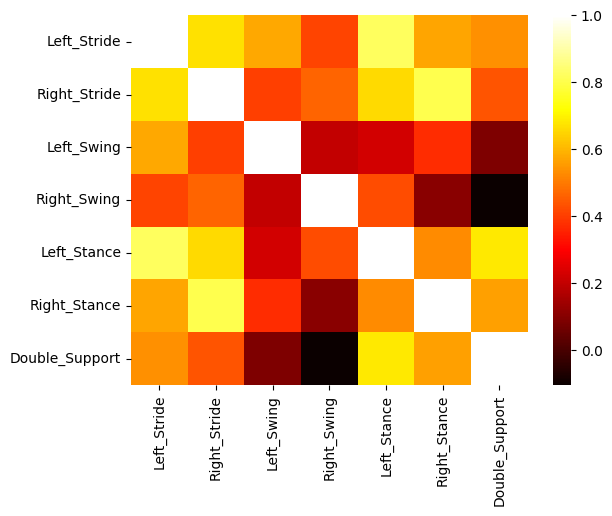

In [18]:
path_grupo = r"C:\Users\mafig\OneDrive\modelos Gait\hunt"
mean_corr_hunt = procesar_grupo(path_grupo)

print("Matriz de correlación promedio (huntington):")
print(mean_corr_hunt);
sn.heatmap(mean_corr_hunt,cmap='hot')

Matriz de correlación promedio (park):
                Left_Stride  Right_Stride  Left_Swing  Right_Swing  \
Left_Stride        1.000000      0.675566    0.526716     0.394333   
Right_Stride       0.675566      1.000000    0.423476     0.469131   
Left_Swing         0.526716      0.423476    1.000000     0.416311   
Right_Swing        0.394333      0.469131    0.416311     1.000000   
Left_Stance        0.822496      0.605328    0.141598     0.299192   
Right_Stance       0.596826      0.799494    0.284410     0.074311   
Double_Support     0.580280      0.365069   -0.053203    -0.147052   

                Left_Stance  Right_Stance  Double_Support  
Left_Stride        0.822496      0.596826        0.580280  
Right_Stride       0.605328      0.799494        0.365069  
Left_Swing         0.141598      0.284410       -0.053203  
Right_Swing        0.299192      0.074311       -0.147052  
Left_Stance        1.000000      0.572734        0.770121  
Right_Stance       0.572734      1.00000

Text(0.5, 1.0, 'Parkinson')

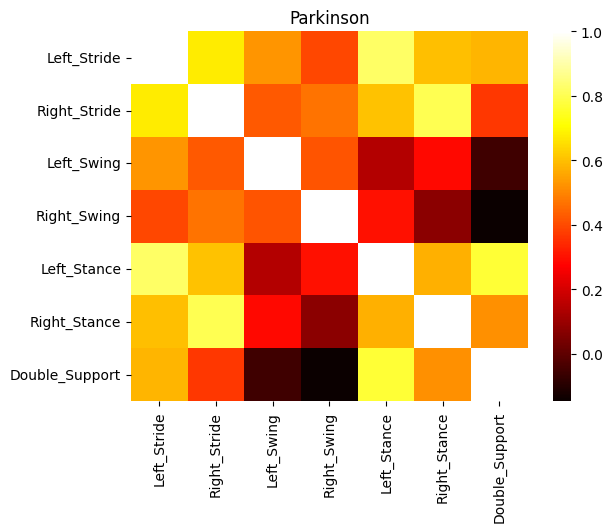

In [23]:
path_grupo = r"C:\Users\mafig\OneDrive\modelos Gait\park"
mean_corr_park = procesar_grupo(path_grupo)

print("Matriz de correlación promedio (park):")
print(mean_corr_park);
sn.heatmap(mean_corr_park,cmap='hot')
plt.title('Parkinson')

- Que el script no contenga errores
- Que los resultados del script sean reproducibles, ie que puedan ser reproducibles en cualquier computadora
- El orden del código
- La lógica del código
- La inferencia empleada para los parámetros utilizados, tales como thresholds para filtrado de matriz, elección de thresholds para selección de alguna banda específica (alfa, beta, delta, etc.)
- Los métodos utilizados, ie, si para construir la matriz de conectividad se utilizó coherencia espectral, PLV o correlación, que haya una razón de ello
- Los resultados mostrados, tales como mapas de calor, grafos 2D, grafos 3D, el mostrar comunidades, hubs, nodos proporcionales al grado, filtrado de matriz de
- Que el análisis haya sido aplicado a cada uno de los ensayos/archivos del dataset

# Matriz de correlación

In [36]:
#Matriz de correlación promedio de Control
mean_corr_control

,Left_Stride,Right_Stride,Left_Swing,Right_Swing,Left_Stance,Right_Stance,Double_Support
Left_Stride,1.000000,0.855592,0.594524,0.579700,0.892827,0.782789,0.710373
Right_Stride,0.855592,1.000000,0.504198,0.607758,0.836193,0.880193,0.661886
Left_Swing,0.594524,0.504198,1.000000,0.357662,0.314516,0.467217,0.161515
Right_Swing,0.579700,0.607758,0.357662,1.000000,0.560109,0.302061,0.153537
Left_Stance,0.892827,0.836193,0.314516,0.560109,1.000000,0.762617,0.829775
Right_Stance,0.782789,0.880193,0.467217,0.302061,0.762617,1.000000,0.762679
Double_Support,0.710373,0.661886,0.161515,0.153537,0.829775,0.762679,1.000000


In [37]:
#Matriz de correlación promedio de ALS
mean_corr_als

,Left_Stride,Right_Stride,Left_Swing,Right_Swing,Left_Stance,Right_Stance,Double_Support
Left_Stride,1.000000,0.739462,0.438200,0.268328,0.861569,0.709638,0.665802
Right_Stride,0.739462,1.000000,0.257363,0.338546,0.764673,0.876115,0.581529
Left_Swing,0.438200,0.257363,1.000000,0.176888,0.162178,0.263275,0.092471
Right_Swing,0.268328,0.338546,0.176888,1.000000,0.299005,0.092592,-0.012612
Left_Stance,0.861569,0.764673,0.162178,0.299005,1.000000,0.732533,0.747091
Right_Stance,0.709638,0.876115,0.263275,0.092592,0.732533,1.000000,0.694197
Double_Support,0.665802,0.581529,0.092471,-0.012612,0.747091,0.694197,1.000000


In [38]:
#Matriz de correlación promedio de Parkinson
mean_corr_park

,Left_Stride,Right_Stride,Left_Swing,Right_Swing,Left_Stance,Right_Stance,Double_Support
Left_Stride,1.000000,0.675566,0.526716,0.394333,0.822496,0.596826,0.580280
Right_Stride,0.675566,1.000000,0.423476,0.469131,0.605328,0.799494,0.365069
Left_Swing,0.526716,0.423476,1.000000,0.416311,0.141598,0.284410,-0.053203
Right_Swing,0.394333,0.469131,0.416311,1.000000,0.299192,0.074311,-0.147052
Left_Stance,0.822496,0.605328,0.141598,0.299192,1.000000,0.572734,0.770121
Right_Stance,0.596826,0.799494,0.284410,0.074311,0.572734,1.000000,0.518788
Double_Support,0.580280,0.365069,-0.053203,-0.147052,0.770121,0.518788,1.000000


In [39]:
#Matriz de correlación promedio de Huntington
mean_corr_hunt

,Left_Stride,Right_Stride,Left_Swing,Right_Swing,Left_Stance,Right_Stance,Double_Support
Left_Stride,1.000000,0.671385,0.575449,0.409625,0.821538,0.572987,0.537105
Right_Stride,0.671385,1.000000,0.404611,0.463886,0.657882,0.803705,0.436332
Left_Swing,0.575449,0.404611,1.000000,0.200514,0.225297,0.371300,0.088902
Right_Swing,0.409625,0.463886,0.200514,1.000000,0.425090,0.107495,-0.103615
Left_Stance,0.821538,0.657882,0.225297,0.425090,1.000000,0.528938,0.681757
Right_Stance,0.572987,0.803705,0.371300,0.107495,0.528938,1.000000,0.563878
Double_Support,0.537105,0.436332,0.088902,-0.103615,0.681757,0.563878,1.000000


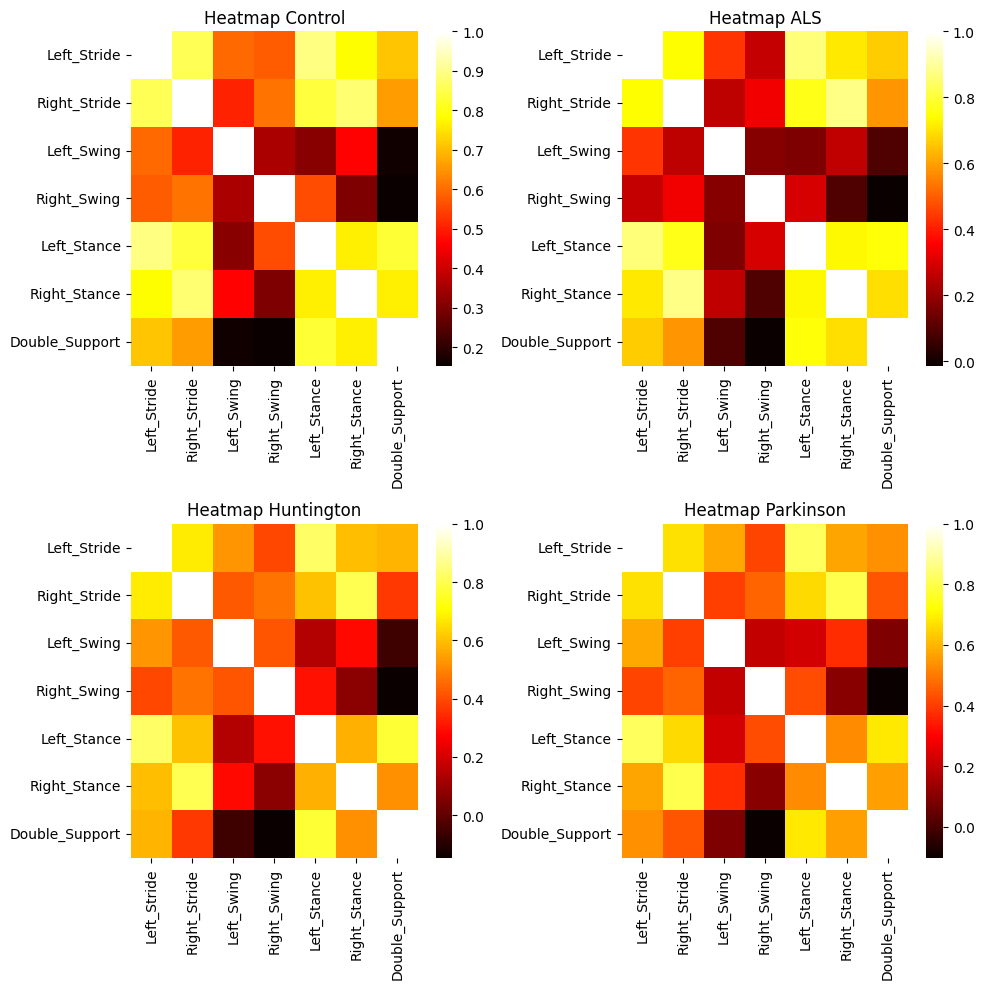

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.heatmap(mean_corr_control,cmap='hot', ax=axes[0, 0])
axes[0, 0].set_title("Heatmap Control")

sns.heatmap(mean_corr_als,cmap='hot', ax=axes[0, 1])
axes[0, 1].set_title("Heatmap ALS")

sns.heatmap(mean_corr_park,cmap='hot', ax=axes[1, 0])
axes[1, 0].set_title("Heatmap Huntington")

sns.heatmap(mean_corr_hunt,cmap='hot', ax=axes[1, 1])
axes[1, 1].set_title("Heatmap Parkinson")

plt.tight_layout()
plt.show()

# Grafo    

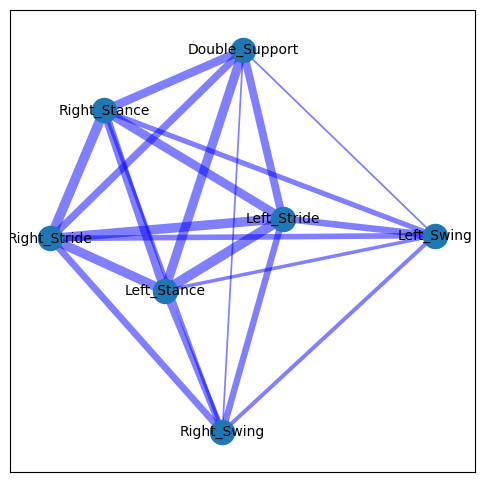

In [66]:
def grafo_nodirigido(matriz):
    A = matriz.copy()
    np.fill_diagonal(A.to_numpy(), 0)
    thr = 0.1
    A[np.abs(A) < thr] = 0
    G=nx.from_pandas_adjacency(A, create_using=nx.Graph)
    
    plt.figure(figsize=(6,6))
    pos=nx.spring_layout(G)
    pesos=nx.get_edge_attributes(G,'weight')
    edge_widths = [abs(w) * 8 for w in pesos.values()]
    edge_colors = ['blue' if w >= 0 else 'red' for w in pesos.values()]
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_edges(G,pos,edge_color=edge_colors,width=edge_widths,alpha=0.5)
    nx.draw_networkx_labels(G, pos, font_size=10)
    
    plt.show()

In [98]:
def grafo_nodirigido(matriz,ax):
    A = matriz.copy()
    np.fill_diagonal(A.to_numpy(), 0)
    thr = 0.4
    A[np.abs(A) < thr] = 0
    G=nx.from_pandas_adjacency(A, create_using=nx.Graph)
    
    plt.figure(figsize=(6,6))
    pos=nx.spring_layout(G)
    pesos=nx.get_edge_attributes(G,'weight')
    edge_widths = [abs(w) * 8 for w in pesos.values()]
    edge_colors = ['blue' if w >= 0 else 'red' for w in pesos.values()]
    nx.draw_networkx_nodes(G, pos,ax=ax)
    nx.draw_networkx_edges(G,pos,edge_color=edge_colors,width=edge_widths,alpha=0.5, ax=ax)
    nx.draw_networkx_labels(G, pos, font_size=10, ax=ax)
    


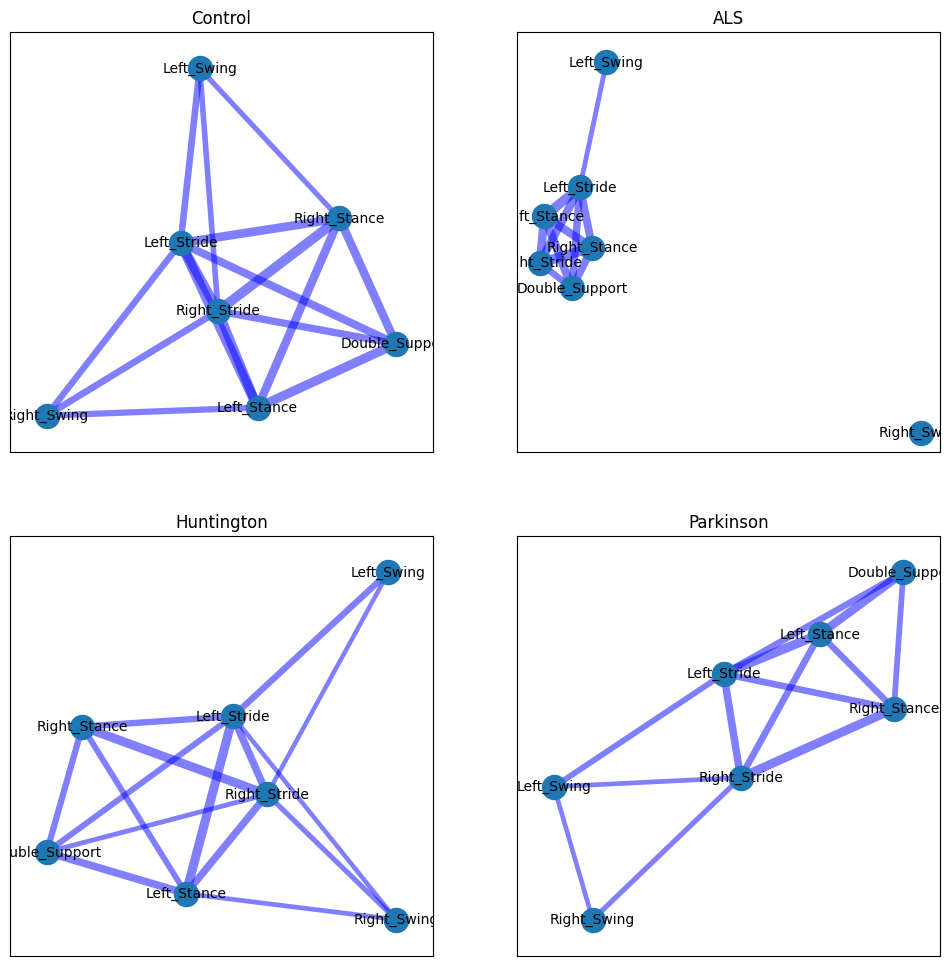

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

In [99]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

grafo_nodirigido(mean_corr_control, axes[0, 0])
axes[0, 0].set_title("Control")

grafo_nodirigido(mean_corr_als, axes[0, 1])
axes[0, 1].set_title("ALS")

grafo_nodirigido(mean_corr_hunt, axes[1, 0])
axes[1, 0].set_title("Huntington")

grafo_nodirigido(mean_corr_park, axes[1, 1])
axes[1, 1].set_title("Parkinson")

plt.tight_layout()
plt.show()

# Métricas

In [ ]:
def metricas(G):
    #grado(num conexiones, 
    #hubs(media+desviación estandar)), 
    #coeficiente de cluster y distancias(rutas más cortas) para identificar mundo pequeño, 
    #betweenes, intermediacion, 
    #cercanía, 
    #rich club, 
    #compendio de comunidades, modularidad, 
    #ley potencia, grafo de escala libre
    # (a) Clustering promedio (coeficiente de agrupamiento)
    clust_coeff = nx.average_clustering(G)
    # (b) Longitud de camino promedio (camino más corto)
    try:
        path_length = nx.average_shortest_path_length(G)
    except nx.NetworkXError:
        path_length = np.nan  # red no conexa
    # (c) Small-worldness (ejemplo simplificado)
    # Comparar con grafo aleatorio de igual N, K
    G_rand = nx.gnm_random_graph(n=G.number_of_nodes(), m=G.number_of_edges())
    clust_rand = nx.average_clustering(G_rand)
    path_rand = nx.average_shortest_path_length(G_rand)
    small_world_sigma = (clust_coeff / clust_rand) / (path_length / path_rand)
    
    # (d) Modularidad — usando método de comunidades
    from networkx.algorithms import community
    communities = community.greedy_modularity_communities(G)
    modularity = community.modularity(G, communities)
    
    # (e) Hubs — grado, centralidad de intermediación
    degree_dict = dict(G.degree())
    betweenness = nx.betweenness_centrality(G)
    
    # (f) Eficiencia global y local
    global_eff = nx.global_efficiency(G)
    local_eff = nx.local_efficiency(G)

    return df=pd.DataFrame(columns=grado, hubs,clust, dist, mp, btw, clsn, rich, comm)

In [100]:
def metricas_grafo(G):
    # Métricas:
    # (a) Clustering promedio (coeficiente de agrupamiento)
    clust_coeff = nx.average_clustering(G)
    # (b) Longitud de camino promedio (camino más corto)
    try:
        path_length = nx.average_shortest_path_length(G)
    except nx.NetworkXError:
        path_length = np.nan  # red no conexa
    # (c) Small-worldness (ejemplo simplificado)
    # Comparar con grafo aleatorio de igual N, K
    G_rand = nx.gnm_random_graph(n=G.number_of_nodes(), m=G.number_of_edges())
    clust_rand = nx.average_clustering(G_rand)
    path_rand = nx.average_shortest_path_length(G_rand)
    small_world_sigma = (clust_coeff / clust_rand) / (path_length / path_rand)
    
    # (d) Modularidad — usando método de comunidades
    from networkx.algorithms import community
    communities = community.greedy_modularity_communities(G)
    modularity = community.modularity(G, communities)
    
    # (e) Hubs — grado, centralidad de intermediación
    degree_dict = dict(G.degree())
    betweenness = nx.betweenness_centrality(G)
    
    # (f) Eficiencia global y local
    global_eff = nx.global_efficiency(G)
    local_eff = nx.local_efficiency(G)

    df = pd.DataFrame({
            "clustering": [clust_coeff],
            "path_length": [path_length],
            "small_world_sigma": [small_world_sigma],
            "modularity": [modularity],
            "global_efficiency": [global_eff],
            "local_efficiency": [local_eff],
            "degree": [degree_dict],                 # diccionario
            "betweenness": [betweenness],       # diccionario
            "communities": [list(communities)]  # lista de sets
        })

    return df


In [92]:
def metricas_grafo(G):
    # Métricas:
    # (a) Clustering promedio (coeficiente de agrupamiento)
    clust_coeff = nx.average_clustering(G)
    # (b) Longitud de camino promedio (camino más corto)
    try:
        path_length = nx.average_shortest_path_length(G)
    except nx.NetworkXError:
        path_length = np.nan  # red no conexa
    # (c) Small-worldness (ejemplo simplificado)
    # Comparar con grafo aleatorio de igual N, K
    G_rand = nx.gnm_random_graph(n=G.number_of_nodes(), m=G.number_of_edges())
    clust_rand = nx.average_clustering(G_rand)
    path_rand = nx.average_shortest_path_length(G_rand)
    small_world_sigma = (clust_coeff / clust_rand) / (path_length / path_rand)
    
    # (d) Modularidad — usando método de comunidades
    from networkx.algorithms import community
    communities = community.greedy_modularity_communities(G)
    modularity = community.modularity(G, communities)
    
    # (e) Hubs — grado, centralidad de intermediación
    degree_dict = dict(G.degree())
    betweenness = nx.betweenness_centrality(G)
    
    # (f) Eficiencia global y local
    global_eff = nx.global_efficiency(G)
    local_eff = nx.local_efficiency(G)

    return clust_coeff, path_length, small_world_sigma, communities, modularity, betweenness, global_eff, local_eff, degree_dict



In [93]:
clust_coeff, path_length, small_world_sigma, communities, modularity, betweenness, global_eff, local_eff, degree_dict=metricas_grafo(G_control)

In [94]:
clust_coeff

1.0

In [95]:
communities

[frozenset({'Left_Stride'}),
 frozenset({'Right_Stride'}),
 frozenset({'Left_Swing'}),
 frozenset({'Right_Swing'}),
 frozenset({'Left_Stance'}),
 frozenset({'Right_Stance'}),
 frozenset({'Double_Support'})]

In [96]:
modularity

0.21186922539172012

In [97]:
degree_dict

{'Left_Stride': 8,
 'Right_Stride': 8,
 'Left_Swing': 8,
 'Right_Swing': 8,
 'Left_Stance': 8,
 'Right_Stance': 8,
 'Double_Support': 8}

In [101]:
A1= mean_corr_control.copy()
np.fill_diagonal(A.to_numpy(), 0)
thr = 0.4
A1[np.abs(A1) < thr] = 0

A2= mean_corr_als.copy()
np.fill_diagonal(A.to_numpy(), 0)
A2[np.abs(A2) < thr] = 0

A3= mean_corr_hunt.copy()
np.fill_diagonal(A.to_numpy(), 0)
A3[np.abs(A3) < thr] = 0

A4= mean_corr_park.copy()
np.fill_diagonal(A.to_numpy(), 0)
A4[np.abs(A4) < thr] = 0

G_control=nx.from_pandas_adjacency(A1, create_using=nx.Graph)
G_als=nx.from_pandas_adjacency(A2, create_using=nx.Graph)
G_hunt=nx.from_pandas_adjacency(A3, create_using=nx.Graph)
G_park=nx.from_pandas_adjacency(A4, create_using=nx.Graph)

df_control= metricas_grafo(G_control)
df_als= metricas_grafo(G_als)
df_hunt= metricas_grafo(G_hunt)
df_park= metricas_grafo(G_park)

df_metricas = pd.concat([
    df_control.assign(condicion="control"),
    df_als.assign(condicion="ALS"),
    df_hunt.assign(condicion="Huntington"),
    df_park.assign(condicion="Parkinson")
], ignore_index=True)

df_metricas

,clustering,path_length,small_world_sigma,modularity,global_efficiency,local_efficiency,degree,betweenness,communities,condicion
0,0.847619,1.238095,0.684615,0.226775,0.880952,0.946939,"{'Left_Stride': 8, 'Right_Stride': 8, 'Left_Sw...","{'Left_Stride': 0.12222222222222222, 'Right_St...","[(Right_Swing, Left_Stance), (Left_Swing, Righ...",control
1,0.657143,NaN,NaN,0.278804,0.619048,0.838095,"{'Left_Stride': 7, 'Right_Stride': 6, 'Left_Sw...","{'Left_Stride': 0.26666666666666666, 'Right_St...","[(Right_Stride, Left_Stance, Right_Stance, Dou...",ALS
2,0.857143,1.285714,0.666667,0.293040,0.857143,0.949660,"{'Left_Stride': 8, 'Right_Stride': 8, 'Left_Sw...","{'Left_Stride': 0.17777777777777776, 'Right_St...","[(Left_Swing, Left_Stride), (Right_Swing, Left...",Huntington
3,0.776190,1.428571,0.597667,0.294679,0.801587,0.930952,"{'Left_Stride': 7, 'Right_Stride': 7, 'Left_Sw...","{'Left_Stride': 0.18888888888888888, 'Right_St...","[(Left_Stance, Right_Stance, Double_Support, L...",Parkinson


In [103]:
df_metricas['degree']

0    {'Left_Stride': 8, 'Right_Stride': 8, 'Left_Sw...
1    {'Left_Stride': 7, 'Right_Stride': 6, 'Left_Sw...
2    {'Left_Stride': 8, 'Right_Stride': 8, 'Left_Sw...
3    {'Left_Stride': 7, 'Right_Stride': 7, 'Left_Sw...
Name: degree, dtype: object